In [2]:
%matplotlib inline

# Project 3
## (b) Feature Dimensionality and Dimensionality Reduction

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import load_digits

data = load_digits()

We saw in part a that each image in the dataset is 8x8 pixels. The `data` array represents flattened (or raveled?) versions of each image, and the shape of that array indicates that the data is 64-dimensional. Visualizing 3-dimensional data is hard enough, 64 will be totally impractical. In part b, we will reduce the dimensionality of the data to make it easier to visualize.

### Principal Component Analysis

[VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) describes Principal Component Analysis (PCA) as a _dimensionality reduction algorithm_, which sounds perfect for this application. It takes n-dimensional data and finds the axes (or particular dimensions) over which the data's variance is greatest. In essence, this algorithm finds columns of data that are most similar and flattens them so that we can learn from only the most different axes.

The linked section of VanderPlas has a nice example that conveniently follows the same `digits` dataset, so the following code will be quite closely based on that example.

In [4]:
from sklearn.decomposition import PCA

We choose to reduce the data to 2 dimensions, because that will be easy to visualize without cutting out too much significant information.

In [5]:
pca = PCA(2)
projection = pca.fit_transform(data.data)

print data.data.shape
print projection.shape

(1797, 64)
(1797, 2)


We can see that the data has been reduced from 64 dimensions to 2. Now, we can easily make a scatter plot of the projected data and compare it to the target.

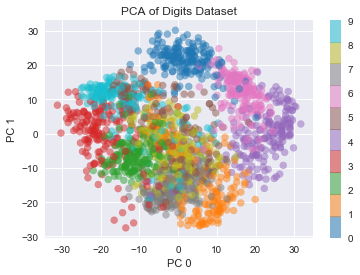

In [20]:
plt.scatter(projection[:, 0], projection[:, 1],
            c = data.target, alpha = 0.5,
            cmap = plt.cm.tab10)
plt.xlabel("PC 0")
plt.ylabel("PC 1")
plt.title("PCA of Digits Dataset")
plt.colorbar()

### Manifold Learning

Manifold learning is complicated, but ultimately is also a method of dimensionality reduction. Some manifold learning algorithms are better suited to high-dimensional datasets like `digits`. 

Here, we will use an isometric mapping model, roughly following an example from [VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html).

For now, only use a fraction of the dataset to keep things running smoothly.

In [29]:
X = data.data[::10]
y = data.target[::10]

Import the isometric mapping function, and use it to project the data down to 2 dimensions.

In [30]:
from sklearn.manifold import Isomap

model = Isomap(2)
proj = model.fit_transform(X)

Now, make a scatter plot of the projected data.

Text(0.5,1,'Isometric Mapping of Digits Dataset')

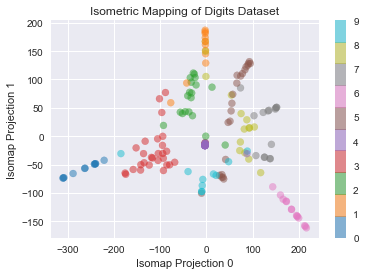

In [31]:
plt.scatter(proj[:, 0], proj[:, 1], c = y,
            alpha = 0.5, cmap = plt.cm.tab10)
plt.colorbar()
plt.xlabel("Isomap Projection 0")
plt.ylabel("Isomap Projection 1")
plt.title("Isometric Mapping of Digits Dataset")